Муратов Никита
БИСТ-20-1
С тех пор как мной были выполнени все остальные работы, эта работа в описании не нуждается, весь код является простейшим.
В любом случае я уточную что это 3я/4я лабораторные работы по регрессионному анализу данных.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sl
import statsmodels.api as sm
import random as rnd
from sklearn.linear_model import LinearRegression

In [2]:
def Y (x):
    return(8.3 * x  - rnd.randint(0,9))

In [4]:
df = pd.read_csv('Electric_Vehicle_Population_Size_History_By_County.csv')

In [5]:
df2= df.sort_values(by=["Percent Electric Vehicles"], ascending=[False]).tail(10000)

In [6]:
display(df2)

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
18147,May 31 2018,Gwinnett,GA,Passenger,0,1,1,85,86,1.16
6299,October 31 2023,Pulaski,MO,Passenger,1,0,1,85,86,1.16
5082,July 31 2019,Honolulu,HI,Passenger,3,3,6,510,516,1.16
8466,July 31 2021,Lake,IL,Passenger,2,0,2,170,172,1.16
13383,June 30 2023,Dallas,TX,Passenger,1,0,1,85,86,1.16
...,...,...,...,...,...,...,...,...,...,...
12105,September 30 2020,Chelan,WA,Truck,0,0,0,"22,718","22,718",0.00
2898,July 31 2021,Snohomish,WA,Truck,1,0,1,"126,166","126,167",0.00
2897,April 30 2019,Wahkiakum,WA,Truck,0,0,0,"1,733","1,733",0.00
2896,December 31 2017,Franklin,WA,Truck,0,0,0,"18,489","18,489",0.00


In [7]:
df2 =pd.DataFrame(df2)

In [8]:
x1 = df2["Percent Electric Vehicles"]
y1 = pd.DataFrame([Y(i) for i in range (10000)])

In [9]:
x = x1.to_numpy()
y = y1.to_numpy()

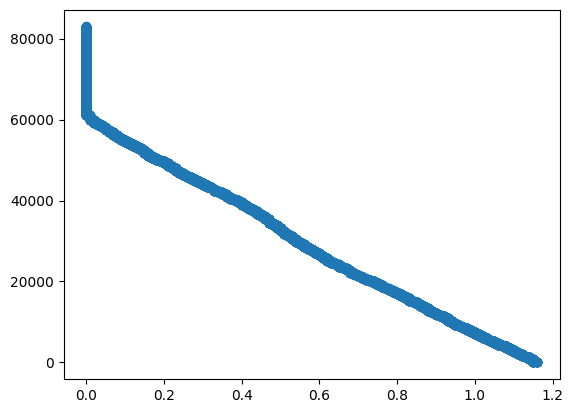

In [10]:
plt.scatter(x,y)

In [11]:
x = x.reshape((-1, 1))

In [12]:
model = LinearRegression().fit(x, y)
sq = model.score(x,y)

In [13]:
print('coefficient of determination:', sq)

coefficient of determination: 0.951538016816314


In [14]:
print('b0:', model.intercept_)
print('b1:', model.coef_[0])

b0: [66831.89756763]
b1: [-62318.65673042]


In [15]:
def Yr (x):
    return(model.intercept_ + model.coef_[0] * x)

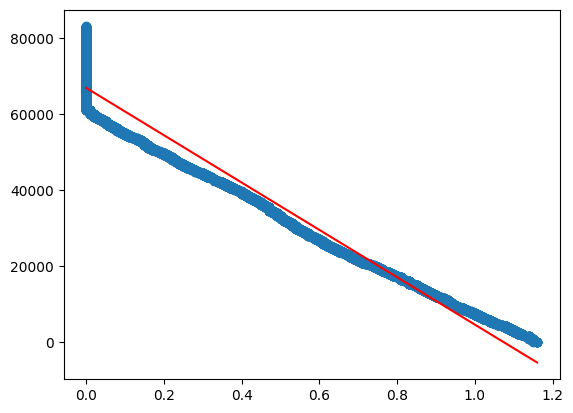

In [16]:
plt.scatter(x,y)
plt.plot(x,Yr(x), color='red')

In [17]:
xp = df2["Percent Electric Vehicles"].head(1000).to_numpy()
xp = xp.reshape((-1, 1))
y_pred = model.predict(xp)
print('predicted response:', y_pred, sep='\n')

predicted response:
[[-5457.74423965]
 [-5457.74423965]
 [-5457.74423965]
 [-5457.74423965]
 [-5457.74423965]
 [-5457.74423965]
 [-5457.74423965]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.55767235]
 [-4834.

In [18]:
model2 = sm.OLS(y,x).fit()
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.094
Model:                            OLS   Adj. R-squared (uncentered):              0.093
Method:                 Least Squares   F-statistic:                              1032.
Date:                Thu, 25 Apr 2024   Prob (F-statistic):                   1.55e-215
Time:                        17:01:12   Log-Likelihood:                     -1.2147e+05
No. Observations:               10000   AIC:                                  2.429e+05
Df Residuals:                    9999   BIC:                                  2.429e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [19]:
def Yr2 (x):
     return(model.intercept_ + model.coef_[0] * x)

In [20]:
y_pred2 = model2.predict(xp)
print(y_pred2)

[30727.90983225 30727.90983225 30727.90983225 30727.90983225
 30727.90983225 30727.90983225 30727.90983225 30463.01405783
 30463.01405783 30463.01405783 30463.01405783 30463.01405783
 30463.01405783 30463.01405783 30463.01405783 30463.01405783
 30463.01405783 30463.01405783 30463.01405783 30463.01405783
 30463.01405783 30463.01405783 30463.01405783 30463.01405783
 30463.01405783 30463.01405783 30463.01405783 30463.01405783
 30463.01405783 30463.01405783 30463.01405783 30463.01405783
 30463.01405783 30463.01405783 30463.01405783 30463.01405783
 30463.01405783 30463.01405783 30463.01405783 30463.01405783
 30463.01405783 30463.01405783 30463.01405783 30463.01405783
 30463.01405783 30463.01405783 30463.01405783 30463.01405783
 30463.01405783 30463.01405783 30463.01405783 30463.01405783
 30463.01405783 30463.01405783 30463.01405783 30463.01405783
 30463.01405783 30463.01405783 30463.01405783 30463.01405783
 30463.01405783 30463.01405783 30463.01405783 30463.01405783
 30463.01405783 30463.01

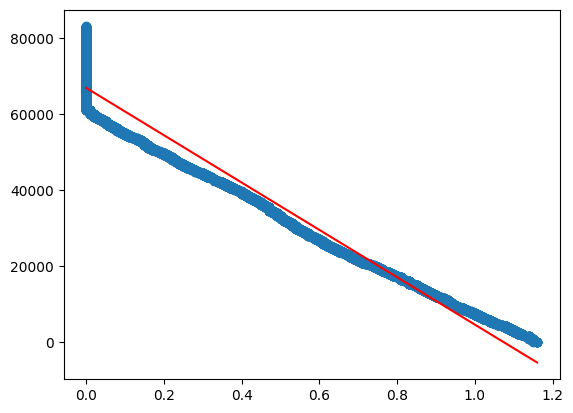

In [21]:
plt.scatter(x,y)
plt.plot(x,Yr2(x), color='red')